In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

In [7]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


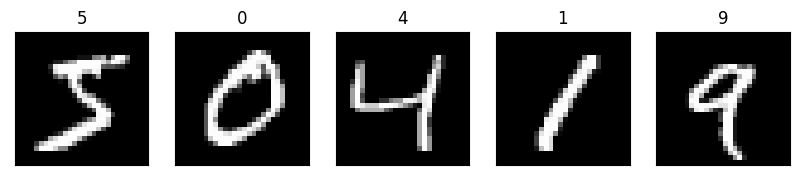

In [10]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [11]:
to_categorical(3, num_classes=10)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [14]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
#model.add(Dense(15, activation='sigmoid'))
#model.add(Dense(25, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [17]:
model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 16s 7ms/step - loss: 1.6012 - acc: 0.5454 - val_loss: 1.1121 - val_acc: 0.7720
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0078 - acc: 0.7563 - val_loss: 0.9140 - val_acc: 0.7719
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8617 - acc: 0.7836 - val_loss: 0.8358 - val_acc: 0.7935
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7909 - acc: 0.7972 - val_loss: 0.7540 - val_acc: 0.8116
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7605 - acc: 0.8073 - val_loss: 0.7324 - val_acc: 0.8172


In [18]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 2s 4ms/step
[[1.03765592e-06 5.78864058e-03 2.27126569e-04 ... 9.22414184e-01
  7.66789075e-04 5.60945943e-02]
 [7.56874606e-02 1.53930159e-02 7.59778976e-01 ... 5.21231908e-04
  5.61528355e-02 1.89904624e-03]
 [3.92926508e-04 8.81807864e-01 2.91225426e-02 ... 2.68583260e-02
  4.12646048e-02 2.36303685e-03]
 ...
 [1.53016535e-05 7.66116951e-04 9.69185028e-04 ... 1.04461946e-01
  1.48492204e-02 7.41437554e-01]
 [7.40199462e-02 8.10088217e-03 1.36385448e-02 ... 1.71489466e-03
  6.83073163e-01 8.41836911e-03]
 [6.51706234e-02 1.20280354e-04 1.04641309e-02 ... 2.70758220e-03
  3.46778473e-03 4.78109950e-03]]


In [19]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 9 8 6]


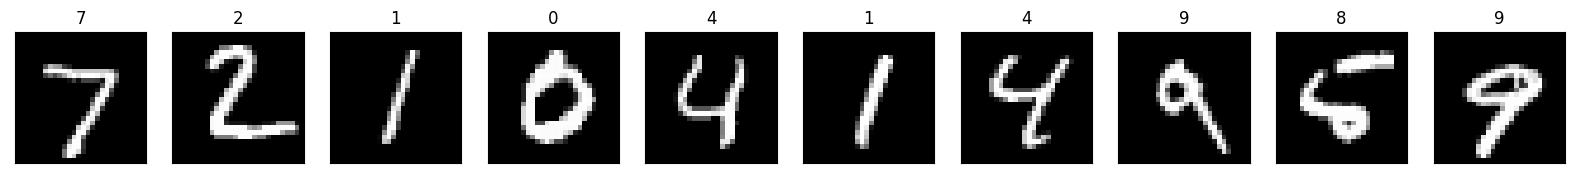

In [20]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()